In [398]:
import pandas as pd
import numpy as np
from sklearn import tree
import graphviz
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from IPython.display import IFrame
import pydotplus
from IPython.display import Image  
import sklearn


In [399]:
df = pd.read_csv('Phishing/phishing.csv',sep=';')

In [400]:
df

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWindow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,1,-1,1,-1,1,1,1,1,-1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
11051,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,1,1,1,1,1,1,-1,1,-1
11052,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,1,-1,1,0,1,-1
11053,-1,-1,1,1,1,-1,-1,-1,1,-1,...,-1,1,1,1,1,-1,1,1,1,-1


In [401]:
df['Result'] = df['Result'].astype(pd.api.types.CategoricalDtype(ordered=False))

In [402]:
df.dtypes

having_IP_Address                 int64
URL_Length                        int64
Shortining_Service                int64
having_At_Symbol                  int64
double_slash_redirecting          int64
Prefix_Suffix                     int64
having_Sub_Domain                 int64
SSLfinal_State                    int64
Domain_registeration_length       int64
Favicon                           int64
port                              int64
HTTPS_token                       int64
Request_URL                       int64
URL_of_Anchor                     int64
Links_in_tags                     int64
SFH                               int64
Submitting_to_email               int64
Abnormal_URL                      int64
Redirect                          int64
on_mouseover                      int64
RightClick                        int64
popUpWindow                       int64
Iframe                            int64
age_of_domain                     int64
DNSRecord                         int64


In [403]:
colnames = df.columns.get_values()

D:\DWNLOADS\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  """Entry point for launching an IPython kernel.


In [404]:
colnames

array(['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State',
       'Domain_registeration_length', 'Favicon', 'port', 'HTTPS_token',
       'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'SFH',
       'Submitting_to_email', 'Abnormal_URL', 'Redirect', 'on_mouseover',
       'RightClick', 'popUpWindow', 'Iframe', 'age_of_domain',
       'DNSRecord', 'web_traffic', 'Page_Rank', 'Google_Index',
       'Links_pointing_to_page', 'Statistical_report', 'Result'],
      dtype=object)

In [405]:
X_train = df.loc[:7000,'having_IP_Address':'Statistical_report']
X_test =  df.loc[10000:,'having_IP_Address':'Statistical_report']
X_val  =  df.loc[7000:10000,'having_IP_Address':'Statistical_report']
Y_val  =  df.loc[7000:10000,'Result']
Y_train = df.loc[:7000,'Result']
Y_test  = df.loc[10000:,'Result']

In [406]:
# Experiment with min_samples_leaf to find the best model.

for leaf in range(1,-1,-20):
    print("min_samples_leaf: %d" % leaf)
    classifier1 = tree.DecisionTreeClassifier(min_samples_leaf=leaf,max_depth=3)
    classifier1.fit(X_train,Y_train)
    Y_pred = classifier1.predict(X_train)
    cm = confusion_matrix(Y_train, Y_pred)
    accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0])
    print("  Accuracy calculated from the training set = %.3f" % (accuracy))
    
    scores = cross_val_score(estimator=classifier1,
                        X=X_val,
                        y=Y_val,
                        scoring="accuracy",
                        cv=k)
    print("  Accuracy calculated using %d-fold cross validation = %.3f" % (k, scores.mean()))

min_samples_leaf: 1
  Accuracy calculated from the training set = 0.915
  Accuracy calculated using 10-fold cross validation = 0.908


In [407]:
# visualize
dot_data1=tree.export_graphviz(classifier1, out_file=None,feature_names=colnames[:30], class_names=['no','yes'])
graph1 = pydotplus.graph_from_dot_data(dot_data1)  

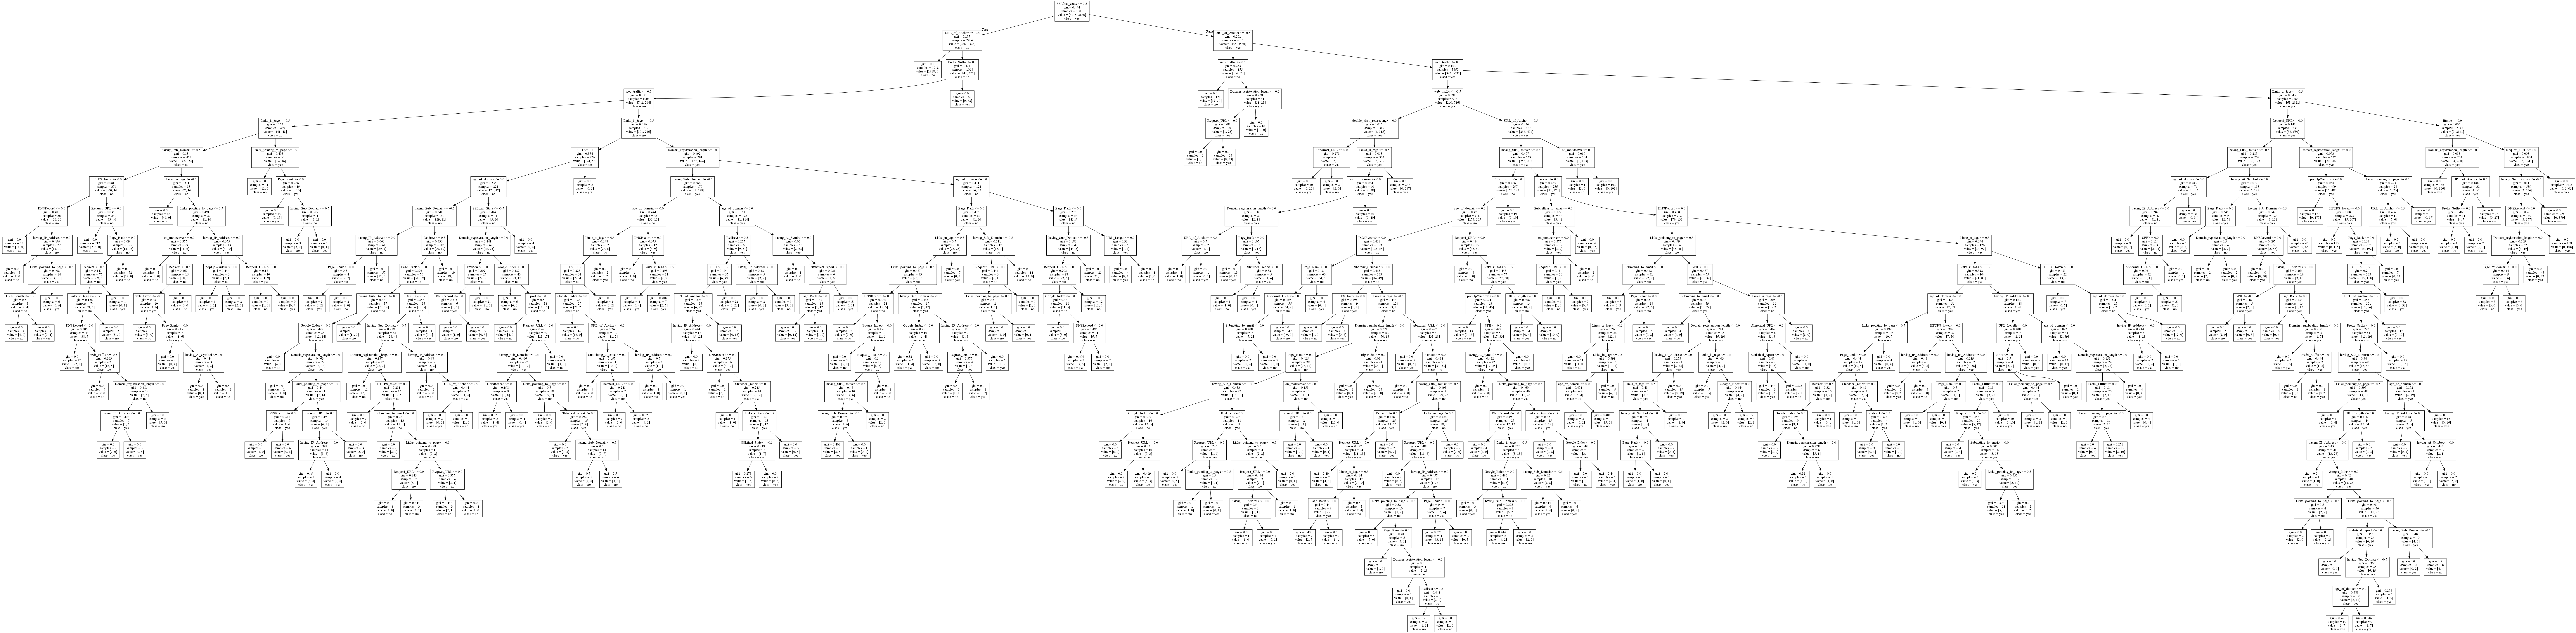

In [335]:
#Final Decision Tree
Image(graph1.create_png(),width=1000, height=1000)

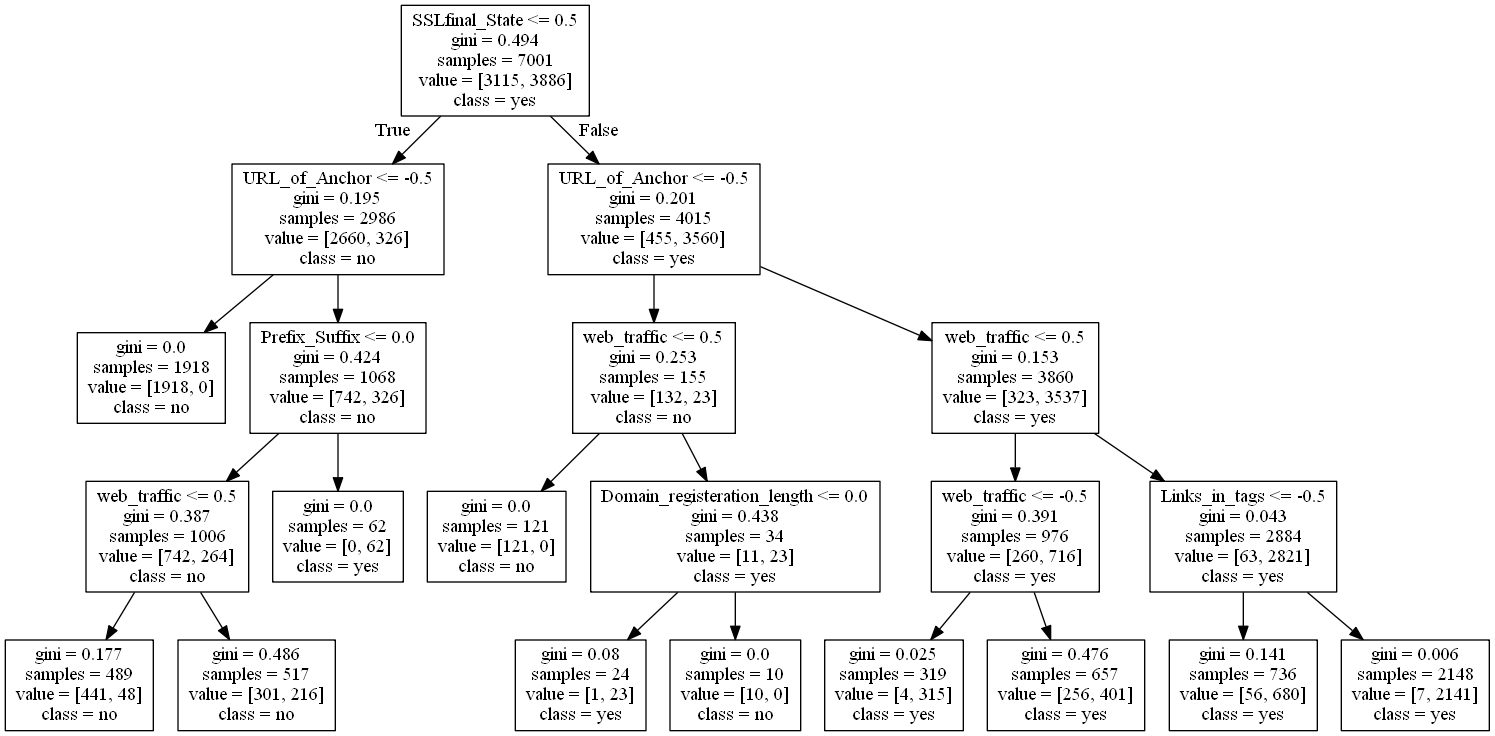

In [408]:
#Final Decision Tree
Image(graph.create_png(),width=1500, height=1500)

In [409]:
#Showing the confusion matrix of the train data with the predicted data
confusion_matrix(Y_train, Y_pred)

array([[2781,  334],
       [ 264, 3622]], dtype=int64)

In [410]:
#Classification report
print(sklearn.metrics.classification_report(Y_train,Y_pred))

              precision    recall  f1-score   support

          -1       0.91      0.89      0.90      3115
           1       0.92      0.93      0.92      3886

    accuracy                           0.91      7001
   macro avg       0.91      0.91      0.91      7001
weighted avg       0.91      0.91      0.91      7001



In [411]:
# Using the  trained model on the test data
# Accuracy estimate with test data

Y_pre = classifier1.predict(X_test)
cd = confusion_matrix(Y_test,Y_pre)
acc = (cd[0][0]+cd[1][1])/(cd[0][0]+cd[1][1]+cd[0][1]+cd[1][0])
print("  Accuracy calculated from the test set = %.3f" % (acc))

    

  Accuracy calculated from the test set = 0.913


## How the model works(for web analysts)
 From the code above the test_data(X-test) contains the information you have about the site in a DataFrame
 
 X_test contains 30 variables which determines the Result 1 or -1. ( 1 means phishing and -1 means legitimate)
 
 -When the Dataframe(X_test) has been pre-processed then you pass it to the trained model classifier1.predict() function
 
 -Then you get an array of the predictions which you can also print out the accuracy and confusion matrix based on your expected output.
 
 -The model is 91% accurate based on my the test_data
 
 ## From the confusion matrix below:
 -The tree classifies correctly 91% of the test data after training.
 
 -There were 44 cases where legitimate site was predicted but they where actually phishing sites
 
 -phishing sites can be predicted with a probability of 92%
 
 -Legitimate sites can be predicted with a probability of 90%
 
 -When the decision tree predicts legitimates sites, the probability of being true is 90%
 
 -When the decision tree predicts phishing sites, the probability of being true is 93%

In [412]:
#Showing the confusion matrix of the test result with predicted result
print(confusion_matrix(Y_test, Y_pre))
print(sklearn.metrics.classification_report(Y_test,Y_pre,target_names=['legitimate','phishing']))

[[417  44]
 [ 48 546]]
              precision    recall  f1-score   support

  legitimate       0.90      0.90      0.90       461
    phishing       0.93      0.92      0.92       594

    accuracy                           0.91      1055
   macro avg       0.91      0.91      0.91      1055
weighted avg       0.91      0.91      0.91      1055



From the following results based on the test data we can deduce that:
- The tree classifies correctly 91% of the test data after training.
- There were 44 cases where legitimate site  was predicted but they where actually phishing sites
- phishing sites can be predicted with a probability of 92%
- Legitimate sites can be predicted with a probability of 90%
- When the decision tree predicts legitimates sites, the probability of being true is 90%
- When the decision tree predicts phishing sites, the probability of being true is 93%